In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [3]:
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()


county  daily_cases  \
Facility Name              date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego            3   
                           2020-03-27  Otsego            5   
                           2020-03-28  Otsego            7   
                           2020-03-29  Otsego           10   
                           2020-03-30  Otsego           17   

                                       daily_cases_by_population  \
Facility Name              date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.000051   
                           2020-03-27                   0.000085   
                           2020-03-28                   0.000120   
                           2020-03-29                   0.000171   
                           2020-03-30                   0.000290   

                                       daily_deaths  \
Facility Name              date                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0   
                           2020-03-27             0   
                           2020-03-28             1   
                           2020-03-29             1   
                           2020-03-30             1   

                                       daily_deaths_by_population  POP2020  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                    0.000000    58524   
                           2020-03-27                    0.000000    58524   
                           2020-03-28                    0.000017    58524   
                           2020-03-29                    0.000017    58524   
                           2020-03-30                    0.000017    58524   

                                       Partially Vaccinated  Fully Vaccinated  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.0               0.0   
                           2020-03-27                   0.0               0.0   
                           2020-03-28                   0.0               0.0   
                           2020-03-29                   0.0               0.0   
                           2020-03-30                   0.0               0.0   

                                       Non Vaccinated  \
Facility Name              date                         
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0.0   
                           2020-03-27             0.0   
                           2020-03-28             0.0   
                           2020-03-29             0.0   
                           2020-03-30             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       ...  Number of ICU Beds By County  \
Facility Name              date        ...                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  ...                          14.0   
                           2020-03-27  ...                          14.0   
                           2020-03-28  ...                          14.0   
                           2020-03-29  ...                          14.0   
                           2020-03-30  ...                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                  

In [57]:
# subset nov - feb

subset = df_sorted.copy()
subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
subset['day_of_month'] = subset.index.get_level_values('date').day
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds'] - subset['Patients Newly Admitted']

subset.loc[:, 'overload_T-1'] = subset.loc[:, 'overload'].shift()
subset.loc[:, 'overload_T-2'] = subset.loc[:, 'overload'].shift(2)

# diff column with difference between yesterday and day
subset.loc[:, 'overload_T-1_diff'] = subset.loc[:,
                                                'overload_T-1'].diff()
subset.loc[:, 'overload_T-2_diff'] = subset.loc[:,
                                                'overload_T-2'].diff()

# overload 7 day in future
subset.loc[:, 'overload-7day'] = subset.loc[:, 'overload'].shift(7)
# dropping NAs
subset = subset.dropna()

target = 'overload-7day'
cols = ['overload-7day', 'overload', 'overload_T-1',
        'overload_T-1_diff', 'overload_T-2',
        'overload_T-2_diff', 'day_of_week', 'day_of_month',]
subset = subset[cols]
# subset = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                 (subset.index.get_level_values('date') <= '2022-01-31')]
subset.head()


# subset_train = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                       (subset.index.get_level_values('date') <= '2022-01-31')]
# subset_test = subset[(subset.index.get_level_values('date') >= '2022-02-01') &
#                      (subset.index.get_level_values('date') <= '2022-02-28')]
# subset_train.shape, subset_test.shape


overload-7day  overload  overload_T-1  \
Facility Name              date                                                
A.O. FOX MEMORIAL HOSPITAL 2020-04-02           20.0      18.0          22.0   
                           2020-04-03           20.0      15.0          18.0   
                           2020-04-04           19.0      21.0          15.0   
                           2020-04-05           14.0      24.0          21.0   
                           2020-04-06           17.0      26.0          24.0   

                                       overload_T-1_diff  overload_T-2  \
Facility Name              date                                          
A.O. FOX MEMORIAL HOSPITAL 2020-04-02                1.0          21.0   
                           2020-04-03               -4.0          22.0   
                           2020-04-04               -3.0          18.0   
                           2020-04-05                6.0          15.0   
                           2020-04-06                3.0          21.0   

                                       overload_T-2_diff  day_of_week  \
Facility Name              date                                         
A.O. FOX MEMORIAL HOSPITAL 2020-04-02                4.0            3   
                           2020-04-03                1.0            4   
                           2020-04-04               -4.0            5   
                           2020-04-05               -3.0            6   
                           2020-04-06                6.0            0   

                                       day_of_month  
Facility Name              date                      
A.O. FOX MEMORIAL HOSPITAL 2020-04-02             2  
                           2020-04-03             3  
                           2020-04-04             4  
                           2020-04-05             5  
                           2020-04-06             6

In [58]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

---------LR----------
LR: 0.942943 (0.010306)
---------KNN----------
KNN: 0.921428 (0.003273)
---------RF----------
RF: 0.919286 (0.003488)


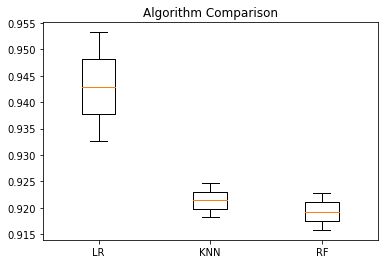

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor

models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
models.append(('KNN', KNeighborsRegressor()))
# Ensemble method - collection of many decision trees
models.append(('RF', RandomForestRegressor(n_estimators=10)))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

X_cols = ['date', 'Facility Name', *cols[1:]]
y_cols = target

# Evaluate each model in turn
results = []
names = []
feature_importances = {}
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=2)
    cv_results = []
    feature_importances[name] = []
    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)

        clf = model
        _ = clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds = clf.predict(X_test)
        # accuracy for the current fold only
        r2score = clf.score(X_test, y_test)
        cv_results.append(r2score)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results = np.asarray(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


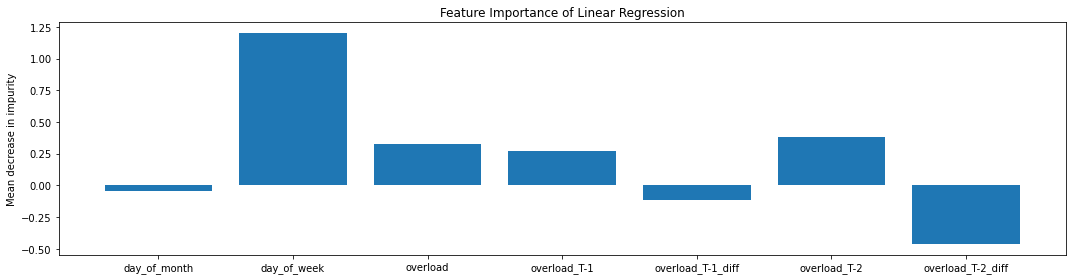

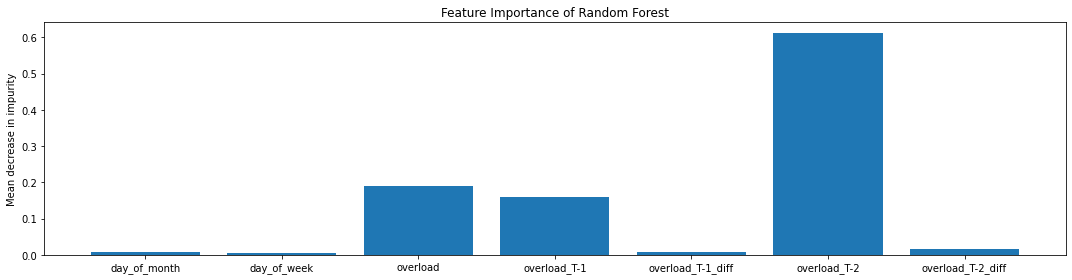

In [61]:
import importlib
import helper
importlib.reload(helper)
#Feature Importance of LR
_model = feature_importances['LR'][0]
helper.plot_feature_importance(_model, title="Feature Importance of Linear Regression")

#Feature Importance of RF
_model = feature_importances['RF'][0]
helper.plot_feature_importance(_model, title="Feature Importance of Random Forest")